In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# Data Source - "https://www.kaggle.com/datasets/ad271828/movie-rating-prediction-with-ludwig"

df = pd.read_csv('/content/drive/MyDrive/Internship/ratings_sample.csv')
df.head()

,user_id,movie_id,rating,genres,production_companies,production_countries,release_year,overview
0,93787,gods+and+monsters+1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998.0,"It's 1957, and Whale's heyday as the director ..."
1,197858,stargate+1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994.0,"An interstellar teleportation device, found in..."
2,76204,toy+story+1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995.0,"Led by Woody, Andy's toys live happily in his ..."
3,667201,friends+with+benefits+2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,2011.0,Jamie is a New York-based executive recruiter ...
4,336750,sleeper+1973,4,Comedy Romance Science Fiction,Rollins-Joffe Productions,United States of America,1973.0,"Miles Monroe, a clarinet-playing health food s..."


In [4]:
df.shape

(1998, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1998 non-null   int64  
 1   movie_id              1998 non-null   object 
 2   rating                1998 non-null   int64  
 3   genres                1996 non-null   object 
 4   production_companies  1985 non-null   object 
 5   production_countries  1994 non-null   object 
 6   release_year          1998 non-null   float64
 7   overview              1997 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 125.0+ KB


In [6]:
# EDA and Preprocessing

In [7]:
df.describe()

,user_id,rating,release_year
count,1998.000000,1998.000000,1998.000000
mean,497375.253253,3.675676,1991.538539
std,290588.824443,1.056216,13.153585
min,56.000000,1.000000,1922.000000
25%,239382.000000,3.000000,1990.000000
50%,490846.000000,4.000000,1995.000000
75%,747196.750000,4.000000,1999.000000
max,998652.000000,5.000000,2014.000000


In [8]:
df.describe(include='O')

,movie_id,genres,production_companies,production_countries,overview
count,1998,1996,1985,1994,1997
unique,1085,455,825,107,1084
top,toy+story+1995,Drama,Paramount Pictures,United States of America,"Led by Woody, Andy's toys live happily in his ..."
freq,13,119,82,1461,13


In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1993    False
1994    False
1995    False
1996    False
1997    False
Length: 1998, dtype: bool

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

user_id                  0
movie_id                 0
rating                   0
genres                   2
production_companies    13
production_countries     4
release_year             0
overview                 1
dtype: int64

In [12]:
df.drop('overview', axis=1, inplace=True)

In [13]:
df.head(2)

,user_id,movie_id,rating,genres,production_companies,production_countries,release_year
0,93787,gods+and+monsters+1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998.0
1,197858,stargate+1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994.0


In [14]:
# Creating column 'Rating_Category' based on Rating column

rating = []
for row in df['rating']:
  if(row > 3.5):
    rating.append('high')
  else:
    rating.append('low')

df['Rating_Category'] = rating

In [15]:
df.head(4)

,user_id,movie_id,rating,genres,production_companies,production_countries,release_year,Rating_Category
0,93787,gods+and+monsters+1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998.0,high
1,197858,stargate+1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994.0,low
2,76204,toy+story+1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995.0,low
3,667201,friends+with+benefits+2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,2011.0,high


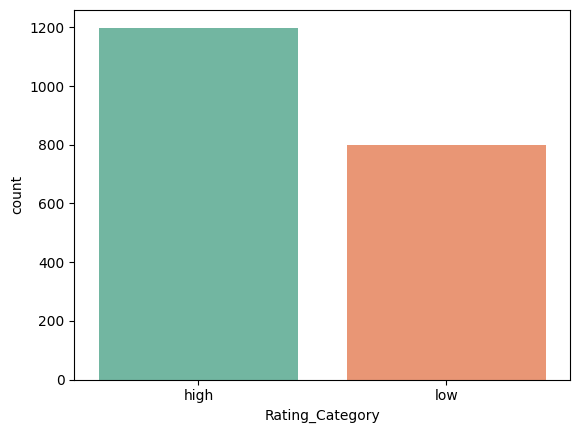

In [16]:
sns.countplot(x='Rating_Category', data=df, palette='Set2')
plt.show()

In [17]:
df['movie_id'] = df['movie_id'].str.replace('+', '')

In [18]:
df.head(4)

,user_id,movie_id,rating,genres,production_companies,production_countries,release_year,Rating_Category
0,93787,godsandmonsters1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998.0,high
1,197858,stargate1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994.0,low
2,76204,toystory1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995.0,low
3,667201,friendswithbenefits2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,2011.0,high


In [19]:
df['release_year'] = df['release_year'].astype(str).str.replace('.0', '')

In [20]:
df.head(4)

,user_id,movie_id,rating,genres,production_companies,production_countries,release_year,Rating_Category
0,93787,godsandmonsters1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998,high
1,197858,stargate1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994,low
2,76204,toystory1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995,low
3,667201,friendswithbenefits2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,11,high


In [21]:
# Data Preparation for Model Building

In [22]:
df.head(4)

,user_id,movie_id,rating,genres,production_companies,production_countries,release_year,Rating_Category
0,93787,godsandmonsters1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998,high
1,197858,stargate1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994,low
2,76204,toystory1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995,low
3,667201,friendswithbenefits2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,11,high


In [23]:
# Spliting movie id into movie_name and year_released
df['year_released'] = df['movie_id'].str[-4:]
df['movie_name'] = df['movie_id'].str[:-4]

In [24]:
df.head(4)

,user_id,movie_id,rating,genres,production_companies,production_countries,release_year,Rating_Category,year_released,movie_name
0,93787,godsandmonsters1998,4,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,1998,high,1998,godsandmonsters
1,197858,stargate1994,3,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,1994,low,1994,stargate
2,76204,toystory1995,3,Animation Comedy Family,Pixar Animation Studios,United States of America,1995,low,1995,toystory
3,667201,friendswithbenefits2011,4,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,11,high,2011,friendswithbenefits


In [25]:
df = df.drop(labels="movie_id",axis=1)
df = df.drop(labels="rating",axis=1)
df = df.drop(labels="release_year",axis=1)

In [26]:
df.head(4)

,user_id,genres,production_companies,production_countries,Rating_Category,year_released,movie_name
0,93787,Drama,Lions Gate Films Flashpoint (I) Showtime Networks,United Kingdom United States of America,high,1998,godsandmonsters
1,197858,Action Adventure Science Fiction,Centropolis Entertainment StudioCanal Carolco ...,France United States of America,low,1994,stargate
2,76204,Animation Comedy Family,Pixar Animation Studios,United States of America,low,1995,toystory
3,667201,Romance Comedy,Castle Rock Entertainment Screen Gems Olive Br...,United States of America,high,2011,friendswithbenefits


In [27]:
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
encoder(df)

In [28]:
# Separate Target and independent variable

X = df.drop(columns='Rating_Category')
y = df['Rating_Category']

In [29]:
# Split the data for train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=27)

In [30]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1398, 6) (600, 6)
(1398,) (600,)


In [31]:
## Tranforming the data using minmax scaling approach so that the values range will be 1.

mm = MinMaxScaler()

X_train.iloc[:,:] = mm.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = mm.transform(X_test.iloc[:,:])

In [32]:
X_train.head(2)

,user_id,genres,production_companies,production_countries,year_released,movie_name
1668,0.872751,0.595604,0.913835,0.878505,0.691358,0.277985
179,0.066296,0.984615,0.898058,0.607477,0.753086,0.922575


In [33]:
X_test.head(2)

,user_id,genres,production_companies,production_countries,year_released,movie_name
878,0.233155,0.391209,0.336165,0.878505,0.753086,0.850746
1199,0.494297,0.415385,0.527913,0.878505,0.753086,0.287313


Model Building


In [35]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs

    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(train_score)

    print(test_score)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Use the above function and train a Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier models and make predictions on test data and evaluate the models


In [37]:
# Decision tree

dt = DecisionTreeClassifier()

fit_n_print(dt, X_train, X_test, y_train, y_test)

1.0
0.5866666666666667
[[229 118]
 [130 123]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       347
           1       0.51      0.49      0.50       253

    accuracy                           0.59       600
   macro avg       0.57      0.57      0.57       600
weighted avg       0.58      0.59      0.59       600



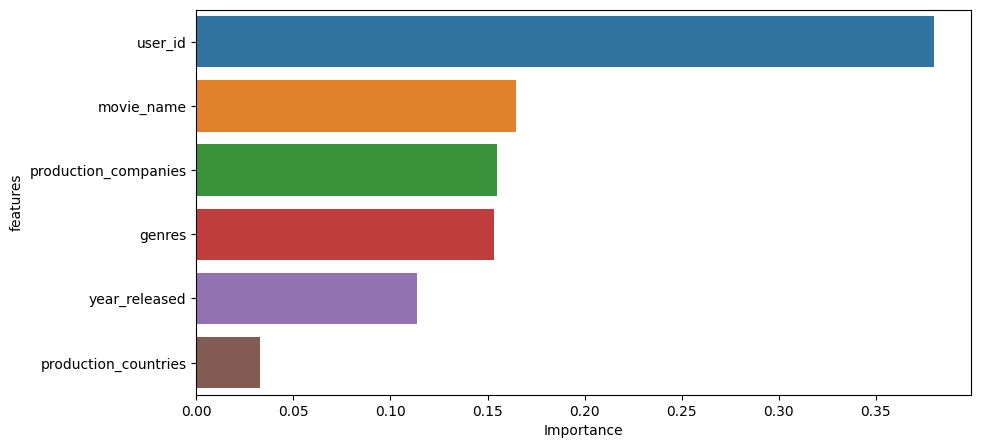

In [38]:
# features importance

feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

In [39]:
# Random forest

rf = RandomForestClassifier()

fit_n_print(rf, X_train, X_test, y_train, y_test)

1.0
0.6
[[264  83]
 [157  96]]
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       347
           1       0.54      0.38      0.44       253

    accuracy                           0.60       600
   macro avg       0.58      0.57      0.57       600
weighted avg       0.59      0.60      0.59       600



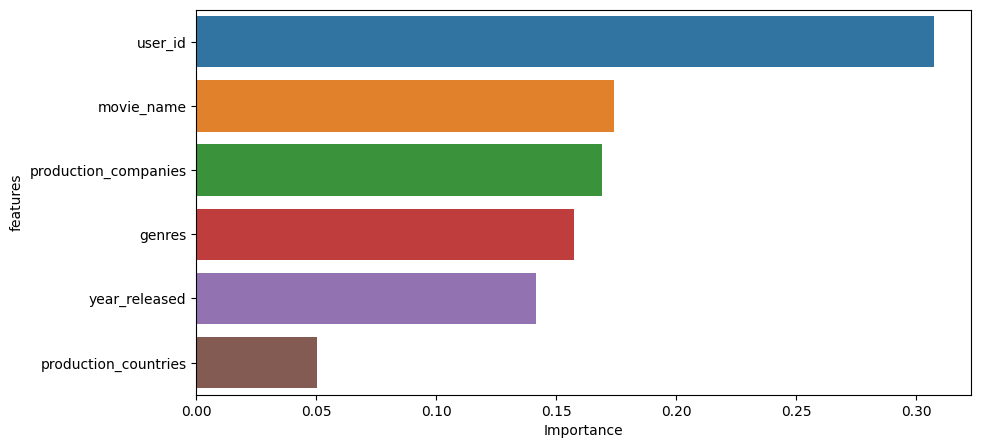

In [40]:
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rf.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

In [41]:
# Bagging classifier

from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()

fit_n_print(bg, X_train, X_test, y_train, y_test)

0.9721030042918455
0.6066666666666667
[[279  68]
 [168  85]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       347
           1       0.56      0.34      0.42       253

    accuracy                           0.61       600
   macro avg       0.59      0.57      0.56       600
weighted avg       0.60      0.61      0.58       600



In [42]:
# Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

fit_n_print(gb, X_train, X_test, y_train, y_test)

0.7560801144492132
0.59
[[289  58]
 [188  65]]
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       347
           1       0.53      0.26      0.35       253

    accuracy                           0.59       600
   macro avg       0.57      0.54      0.52       600
weighted avg       0.57      0.59      0.55       600



In [43]:
# Ada boosting

from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

fit_n_print(ab, X_train, X_test, y_train, y_test)

0.6738197424892703
0.57
[[282  65]
 [193  60]]
              precision    recall  f1-score   support

           0       0.59      0.81      0.69       347
           1       0.48      0.24      0.32       253

    accuracy                           0.57       600
   macro avg       0.54      0.52      0.50       600
weighted avg       0.55      0.57      0.53       600



In [50]:
# Stacking

from sklearn.ensemble import StackingClassifier
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)

fit_n_print(clf, X_train, X_test, y_train, y_test)

0.6337625178826896
0.5883333333333334
[[279  68]
 [179  74]]
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       347
           1       0.52      0.29      0.37       253

    accuracy                           0.59       600
   macro avg       0.57      0.55      0.53       600
weighted avg       0.57      0.59      0.56       600



In [57]:
# Applying Logistic regression model

from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression(max_iter=10000)
regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [58]:
print('Train data Accuracy is: ',regression_model.score(X_train, y_train))

Train data Accuracy is:  0.6094420600858369


In [59]:
print('Test data Accuracy is: ',regression_model.score(X_test, y_test))

Test data Accuracy is:  0.5783333333333334


In [60]:
prediction=regression_model.predict(X_test)
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))

[[346   1]
 [252   1]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       347
           1       0.50      0.00      0.01       253

    accuracy                           0.58       600
   macro avg       0.54      0.50      0.37       600
weighted avg       0.55      0.58      0.43       600

